# 1. Chapter Overview
The term abstraction in the context of programming
refers to a layer of code “on top” of existing code that performs purpose-driven gener‐
alizations of the original code. Abstractions are formed by grouping and wrapping
pieces of code that are related to some higher-order functionality in a way that con‐
veniently reframes them together. The result is simplified code that is easier to write,
read, and debug, and generally easier and faster to work with. In many cases Tensor‐
Flow abstractions not only make the code cleaner, but can also drastically reduce
code length and as a result significantly cut development time.

See detailes:
https://github.com/Hezi-Resheff/Oreilly-Learning-TensorFlow/blob/master/07__abstractions/Chapter7.ipynb

In [ ]:
## abstraction example defined by self
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape)
    
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding ="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool_2x2(x, ksize=[1,2,2,1],
                             strides=[1,2,2,1],
                             padding="SAME")

# shape: filter
def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    h = tf.nn.relu(conv2d(input, W) + b)
    hp = max_pool_2x2(h)
    
    return hp

# create model
x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(-1, 28, 28, 1)

h1 = conv_layer(x_image, shape[5,5,1,32])
h2 = conv_layer(h1, shape[5,5,32,64])
h3 = conv_layer(h2, shape[5,5,64,32])



#### origin version
x = tf.placeholder(tf.float32, shape=[None, 784])
x_image = tf.reshape(x, [-1, 28, 28, 1])

W1 = tf.truncated_normal([5, 5, 1, 32], stddev=0.1)
b1 = tf.constant(0.1, shape=[32])
h1 = tf.nn.relu(tf.nn.conv2d(x_image, W1, 
                             strides=[1, 1, 1, 1], padding='SAME') + b1)
hp1 = tf.nn.max_pool(h1, ksize=[1, 2, 2, 1], 
                     strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.truncated_normal([5, 5, 32, 64], stddev=0.1)
b2 = tf.constant(0.1, shape=[64])
h2 = tf.nn.relu(tf.nn.conv2d(hp1, W2,
                             strides=[1, 1, 1, 1], padding='SAME') + b2)
hp2 = tf.nn.max_pool(h2, ksize=[1, 2, 2, 1],
                     strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.truncated_normal([5, 5, 64, 32], stddev=0.1)
b3 = tf.constant(0.1, shape=[32])
h3 = h1 = tf.nn.relu(tf.nn.conv2d(hp2, W3,
                                  strides=[1, 1, 1, 1], padding='SAME') + b3)
hp3 = tf.nn.max_pool(h3, ksize=[1, 2, 2, 1],
                     strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
## In contrib.learn , one of the abstractions available for TensorFlow, 
# the core of defining and training a linear regression model similar 
# to the one at the end of Chapter 3 could be done in just two lines:

regressor = learn.LinearRegressor(feature_columns=feature_columns,
                                 optimizer=optimizer)
regressor.fit(X,Y, steps=200, batch_size=506)

## High-Level Survey
More than a few great TensorFlow open source extensions are available at the time of
writing this book. Among the popular ones are:
- tf.contrib.learn
- TFLearn
- TF-Slim
- Keras

While TFLearn needs to be installed, **contrib.learn** and TF-Slim (now **tf.con
trib.slim** ) are merged with TensorFlow and therefore require no installation. In
2017 Keras gained official Google support, and it has also been moved into tf.con
trib as of version 1.1 ( **tf.contrib.keras** ). The name contrib refers to the fact that
code in this library is “contributed” and still requires testing to see if it receives broad acceptance. Therefore, it could still change, and is yet to be part of the core TensorFlow.

contrib.learn started as an independent simplified interface for TensorFlow and
was initially called Scikit Flow, with the intention of making the creation of complex
networks with TensorFlow more accessible for those who are transitioning from the
scikit-learn world of “one-liner” machine learning. As is often the case, it was later
merged to TensorFlow and is now regarded as its Learn module, with extensive docu‐
mentation and examples that are available on the official TensorFlow website.

While contrib.learn is more transparent and low-level, the other three extensions
are a bit cleaner and more abstract, and each has its own specialties and little advan‐
tages that might come in handy depending on the needs of the user. 

TFLearn and Keras are full of functionality and have many of the elements needed for
various types of state-of-the-art modeling. Unlike all the other libraries, which were
created to communicate solely with TensorFlow, **Keras supports both TensorFlow and
Theano (a popular library for deep learning).**

TF-Slim was created mainly for designing complex convolutional nets with ease and
has a wide variety of pretrained models available, relieving us from the expensive
process of having to train them ourselves.

These libraries are very dynamic and are constantly changing, with the developers
adding new models and functionalities, and occasionally modifying their syntax.

In the following sections we demonstrate how to use these extensions, alongside
some examples. We begin by focusing on contrib.learn , demonstrating how easily
it lets us train and run simple regression and classification models. Next we introduce
TFLearn and revisit the more advanced models introduced in the previous chapters—
CNN and RNN. We then give a short introduction to autoencoders and demonstrate
how to create one with Keras. Finally, we close this chapter with brief coverage of TF-
Slim and show how to classify images using a loaded pretrained state-of-the-art CNN
model.


#### Theano
Theano is a Python library that allows you to manipulate symbolic
mathematical expressions that involve tensor arrays in an efficient
way, and as such it can serve as a deep learning framework, com‐
peting with TensorFlow. Theano has been around longer, and
therefore is a bit more mature than TensorFlow, which is still
changing and evolving but is rapidly becoming the leader of the
pack (it is widely considered by many to already be the leading
library, with many advantages over other frameworks).

# 2. Contrib.learn

We start with contrib.learn ’s out-of-the-box estimators (a fancy name for models),
which we can train in a quick and efficient manner. These predefined estimators
include simple linear and logistic regression models, a simple linear classifier, and a
basic deep neural network. Table 7-1 lists some of the popular estimators we can use.

Table 7-1. Popular built-in contrib.learn estimators
Estimator
- LinearRegressor():
Linear regression model to predict label value given observation of feature values.

- LogisticRegressor() 
Logistic regression estimator for binary classification.


- LinearClassifier()
Linear model to classify instances into one of multiple possible classes. When the number of possible classes is 2, this is binary classification.

- DNNRegressor() 
A regressor for TensorFlow deep neural network (DNN) models.

- DNNClassifier() 
A classifier for TensorFlow DNN models.


Of course, we would also like to use more-advanced and customized models, and for
that contrib.learn lets us conveniently wrap our own homemade estimators, a fea‐
ture that will be covered as we go along. Once we have an estimator ready for deploy‐
ment, whether it was made for us or we made it ourselves, the steps are pretty much
the same:
1. We instantiate the estimator class to create our model:
   - model = learn.<some_Estimator>()
2. Then we fit it using our training data:
   - model.fit()
3. We evaluate the model to see how well it does on some given dataset:
   - model.evaluate()
4. Finally, we use our fitted model to predict outcomes, usually for new data:
  - model.predict()

These four fundamental stages are also found in other extensions.
contrib offers many other functionalities and features; in particular, contrib.learn
has a very neat way to treat our input data, which will be the focus of the next subsec‐
tion, where we discuss linear models.

In [2]:
# Using contrib.learn doesn’t require any installation 
# since it’s been merged with TensorFlow:
import tensorflow as tf
from tensorflow.contrib import learn


## Linear Regression
We start our contrib.learn engagement with one of its strongest features: linear
models. We say that a model is linear whenever it is defined by a function of a weigh‐
ted sum of the features, or more formally f(w 1 x 1 + w 2 x 2 +...+ w n x n ), where f could be any sort of function, like the identity function (as in linear regression) or a logistic function (as in logistic regression). Although limited in their expressive power, linear models have lots of advantages, such as clear interpretability, optimization speed, and simplicity.

In Chapter 3 we created our own linear regression model using native TensorFlow by
first creating a graph with placeholders for the input and target data, Variables for the
set of parameters, a loss function, and an optimizer. After the model was defined, we
ran the session and obtained results.

In the following section we first repeat this full process, and then show how drasti‐
cally easier it is to do with contrib.learn . For this example we use the Boston Hous‐
ing dataset, available to download using the sklearn library. The **Boston Housing**
dataset is a relatively small dataset (506 samples), containing information concerning
housing in the area of Boston, Massachusetts. There are 13 predictors in this dataset:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of nonretail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxide concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property tax rate per $10,000
- PTRATIO: pupil–teacher ratio by town
- B: 1000(Bk – 0.63)^2, where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

**The target variable is the median value of owner-occupied homes in thousands of
dollars. In this example we try to predict the target variable by using some linear
combination of these 13 features.**

In [3]:
# First, import the data
# pip3 install -U scikit-learn scipy matplotlib
from sklearn import datasets, metrics, preprocessing
boston = datasets.load_boston()
x_data = preprocessing.StandardScaler().fit_transform(boston.data)
y_data = boston.target

**Next, we use the same linear regression model as in Chapter 3. This time we track the “loss” so we can measure the mean squared error (MSE), which is the average of the squared differences between the real target value and our predicted value. We use this measure as an indicator of how well our model performs:**

In [4]:
x = tf.placeholder(tf.float64, shape=(None, 13))
y_true = tf.placeholder(tf.float64, shape=(None))

with tf.name_scope('inference') as scope:
    w = tf.Variable(tf.zeros([1,13], dtype=tf.float64, name='weights'))
    b = tf.Variable(0, dtype=tf.float64, name='bias')
    y_pred = tf.matmul(w, tf.transpose(x)) + b
    
with tf.name_scope('loss') as scope:
    loss = tf.reduce_mean(tf.square(y_true - y_pred))
    
with tf.name_scope('train') as scope:
    learning_rate = 0.1 
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    train = optimizer.minimize(loss)
    
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(200):
        sess.run(train, {x:x_data, y_true:y_data})
    
    MSE = sess.run(loss, {x:x_data, y_true:y_data})
    
print(MSE)



21.89919450480802


### using contrib.learn ’s estimator for linear regression
The whole process of defining, fitting, and evaluating the model comes down to
just a few lines:
1. The linear regression model is instantiated using learn.LinearRegressor() and
fed with knowledge about the data representation and the type of optimizer:
2. The regressor object is trained using .fit() . We pass the covariates and the tar‐
get variable, and set the number of steps and batch size:
3. The MSE loss is returned by .evaluate():

In [5]:
num_steps = 200
minibatch_size = 506 

feature_columns = learn.infer_real_valued_columns_from_input(x_data)

reg = learn.LinearRegressor(feature_columns=feature_columns,
                           optimizer=tf.train.GradientDescentOptimizer(
                           learning_rate=0.1))

reg.fit(x_data, boston.target, steps=num_steps,
       batch_size=minibatch_size)

MSE = reg.evaluate(x_data, boston.target, steps=1)

print(MSE)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_device_fn': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_train_distribute': None, '_is_chief': True, '_model_dir': '/tmp/tmp83_q_4bt', '_cluster_s

INFO:tensorflow:Starting evaluation at 2019-01-12-13:30:17
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp83_q_4bt/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2019-01-12-13:30:17
INFO:tensorflow:Saving dict for global step 200: global_step = 200, loss = 21.899193
{'global_step': 200, 'loss': 21.899193}


## DNN Classifier
The DNNClassifier estimator allows us to perform a similar task with a considerably reduced amount of code. Also, it lets us add hidden layers (the “deep” part of the DNN).

In [6]:
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data

data_dir = "datasets/MNIST"
data = input_data.read_data_sets(data_dir, one_hot=False)

x_data, y_data = data.train.images, data.train.labels.astype(np.int32)
x_test, y_test = data.test.images, data.test.labels.astype(np.int32)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
num_steps = 2000
minibatch_size = 128 

feature_columns = learn.infer_real_valued_columns_from_input(x_data)

dnn = learn.DNNClassifier(feature_columns=feature_columns,
                         hidden_units=[200],
                         n_classes=10,
                         optimizer=tf.train.ProximalAdagradOptimizer(
                         learning_rate=0.2))

dnn.fit(x=x_data, y=y_data, steps=num_steps,
       batch_size=minibatch_size)

test_acc = dnn.evaluate(x=x_test, y=y_test, steps=1)["accuracy"]
print('test accuracy: {}'.format(test_acc))

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_device_fn': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_train_distribute': None, '_is_chief': True, '_model_dir': '/tmp/tmpf8t037j8', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f6b809d0710>, '_keep_checkpoint_every_n_hours': 10000, '_num_worker_replicas': 0, '_save_summary_steps': 100, '_task_type': None, '_task_id': 0, '_session_config': None, '_num_ps_replicas': 0, '_log_step_count_steps': 100, '_environment': 'local', '_save_checkpoints_steps': None, '_evaluation_master': ''}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints fo

In [8]:
'''
Using the <Estimator>.predict() method, we can predict the classes of new sam‐
ples. Here we will use the predictions to demonstrate how we can analyze our model’s
performance—what classes were best identified and what types of typical errors were
made. Plotting a confusion matrix can help us understand these behaviors. We import
the code to create the confusion matrix from the scikit-learn library:
'''
from sklearn.metrics import confusion_matrix

y_pred = dnn.predict(x=x_test, as_iterable=False)
class_names = {'0','1','2','3','4','5','6','7','8','9'}
cnf_matrix = confusion_matrix(y_test, y_pred)

Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Please switch to predict_classes, or set `outputs` argument.
Instructions for updating:
The default behavior of predict() is changing. The default value for
as_iterable will change to True, and then the flag will be removed
altogether. The behavior of this flag is described below.
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available in the SKCompat class, Estimator will only accept input_fn.
Example conversion:
  est = Estimator(...) -> est = SKCompat(Estimator(...))
Instructions for updating:
Estimator is decoupled from Scikit Learn interface by moving into
separate class SKCompat. Arguments x, y and batch_size are only
available

In [9]:
'''
The confusion matrix is shown in Figure 7-2. Its rows correspond to the true digits,
its columns to the predicted digits. We see, for example, that the model sometimes
misclassified 5 as 3 and 9 as 4 and 7.
'''
cnf_matrix

array([[ 972,    0,    1,    1,    0,    2,    1,    1,    2,    0],
       [   0, 1125,    3,    1,    0,    1,    2,    1,    2,    0],
       [   6,    0, 1008,    2,    1,    0,    3,    6,    6,    0],
       [   1,    0,    4,  996,    0,    0,    0,    4,    3,    2],
       [   2,    0,    3,    0,  963,    0,    5,    2,    2,    5],
       [   3,    1,    0,   18,    1,  854,    7,    1,    6,    1],
       [   5,    3,    0,    1,    3,    2,  944,    0,    0,    0],
       [   1,    7,   10,    1,    1,    0,    0, 1000,    2,    6],
       [   3,    0,    2,    6,    4,    1,    4,    3,  949,    2],
       [   4,    4,    1,    6,    9,    0,    2,   10,    4,  969]])

## FeatureColumn
One of contrib.learn ’s nicest offerings is handling features of different types, which
can sometimes be a little tricky. To make things easier, contrib.learn offers us the
FeatureColumn abstraction.

With a FeatureColumn we can maintain a representation of a single feature in our
data, while performing a range of transformations defined over it. **A FeatureColumn
can be either one of the original columns or any new columns that may be added
depending on our transformations.** These may include creating a suitable and effec‐
tive representation for categorical data by encoding it as a sparse vector (often
referred to as dummy encoding), creating feature crosses to look for feature interac‐
tions, and bucketization (discretization of the data). All this can be done while
manipulating the feature as a single semantic unit (encompassing, for example, all
dummy vectors).

We use the FeatureColumn abstraction to specify the form and structure of each fea‐
ture of our input data. For instance, let’s say that our target variable is height , and we try to predict it using two features, weight and species . We make our own synthetic
data where heights are generated by dividing each weight by a factor of 100 and
adding a constant that varies according to the species: 1 is added for Humans, 0.9 for
Goblins, and 1.1 for ManBears. We then add normally distributed noise to each
instance

In [2]:
# python3 -m pip install --upgrade pandas==0.23.0
# pip3 install python-dateutil==2.5.0
import numpy as np
import pandas as pd 
N = 10000 

weight = np.random.randn(N)*5 + 70 
spec_id = np.random.randint(0,3,N)
bias = [0.9, 1, 1.1]
height = np.array([weight[i]/100 + bias[b] for i, b in enumerate(spec_id)])
spec_name = ['Goblin', 'Human', 'ManBears']
spec = [spec_name[s] for s in spec_id]


In [11]:
print(weight.shape)
print(weight[:3])
print(spec_id.shape)
print(spec_id[:3])
print([{i:b} for i, b in enumerate(spec_id[:3])])

(10000,)
[75.16260635 70.61638469 65.90843837]
(10000,)
[0 2 0]
[{0: 0}, {1: 2}, {2: 0}]


### Pandas
Pandas is a very popular and useful library in Python for working
with relational or labeled data like tabular data, multidimensional
time series, etc. For more information on how to use Pandas, we
refer the reader to Wes McKinney’s book Python for Data Analysis
(O’Reilly). 

In [12]:
# We use the Pandas library to have the data represented as a data frame (table), 
# so that we can conveniently access each of its columns:
df = pd.DataFrame({'Species': spec, 'Weight':weight, 'Height':height})
df[:10]

,Height,Species,Weight
0,1.651626,Goblin,75.162606
1,1.806164,ManBears,70.616385
2,1.559084,Goblin,65.908438
3,1.576107,Goblin,67.610678
4,1.723565,Human,72.356487
5,1.592225,Goblin,69.222451
6,1.689984,Human,68.998447
7,1.648502,Goblin,74.850182
8,1.747055,ManBears,64.705468
9,1.801484,ManBears,70.148378


### Layers
contrib.layers is not a part of contrib.learn , but another inde‐
pendent subsection of the TensorFlow Python API that offers high-
level operations and tools for building neural network layers.

In [14]:
# We start by specifying the nature of each feature. 
# For Weight we use the following FeatureColumn command, 
# indicating that it’s a continuous variable:
import tensorflow as tf
from tensorflow.contrib import layers
from tensorflow.contrib import learn

# The name that was passed to the function (in this case Weight ) 
# is crucially important, since it will be used to associate 
# the FeatureColumn representation with the actual data.
Weight = layers.real_valued_column("Weight")

'''
Species is a categorical variable, meaning its values have no natural ordering, and
therefore cannot be represented as a single variable in the model. Instead, it has to be
extended and encoded as several variables, depending on the number of cate‐
gories. FeatureColumn does this for us, so we just have to use the following command
to specify that it is a categorical feature and indicate the name of each category:
'''
Species = layers.sparse_column_with_keys(column_name='Species',
                                        keys=['Goblin','Human','ManBears'])

In [15]:
# Next, we instantiate an estimator class 
# and input a list of our FeatureColumn s:
reg = learn.LinearRegressor(feature_columns=[Weight, Species])

Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_device_fn': None, '_num_ps_replicas': 0, '_master': '', '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0f3292eeb8>, '_save_checkpoints_steps': None, '_task_type': None, '_tf_random_seed': None, '_model_dir': '/tmp/tmpyd2tsnwg', '_num_worker_replicas': 0, '_save_summary_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_environment': 'local', '_train_distribute': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_evaluation_master': '', '_session_config': None, '_is_chief': True, '_keep_checkpoint_max': 5, '_tf_config': gpu_options {
  per_process_g

Up to now we’ve defined how the data will be represented in the model; in the follow‐
ing stage of fitting the model we need to provide the actual training data. In the Bos‐
ton Housing example, the features were all numeric, and as a result we could just
input them as x_data and target data.

Here, contrib.learn requires that we use an additional encapsulating input function.
The function gets both predictors and target data in their native form (Pandas data
frame, NumPy array, list, etc.) as input, and returns a dictionary of tensors. In these
dictionaries, each key is a name of a FeatureColumn (the names Weight and Species
that were given as input previously), and its value needs to be a Tensor that contains
the corresponding data. This means that we also have to transform the values into a
TensorFlow Tensor inside the function.

In our current example, the function receives our data frame, creates a dictionary fea
ture_cols , and then stores the values of each column in the data frame as a Tensor
for the corresponding key. It then returns that dictionary and the target variable as a
Tensor. The keys have to match the names we used to define our FeatureColumns:

In [27]:
def input_fn(df):
    feature_cols = {}
    feature_cols['Weight'] = tf.constant(df['Weight'].values)
    feature_cols['Species'] = tf.SparseTensor(
        indices=[[i, 0] for i in range(df['Species'].size)],
        values=df['Species'].values,
        dense_shape=[df['Species'].size, 1])
    
    labels = tf.constant(df['Height'].values)
    
    return feature_cols, labels


In [23]:
'''
The values of Species are required by their FeatureColumn specification to be enco‐
ded in a sparse format. For that we use tf.SparseTensor() , where each i index cor‐
responds to a nonzero value (in this case, all the rows in a one-column matrix).
For example, the following:

SparseTensor(indices=[[0, 0], [2, 1], [2, 2]], values=[2, 5, 7],
dense_shape=[3, 3])

represents the dense tensor:
[[2, 0, 0]
[0, 0, 0]
[0, 5, 7]]
'''

'\nThe values of Species are required by their FeatureColumn specification to be enco‐\nded in a sparse format. For that we use tf.SparseTensor() , where each i index cor‐\nresponds to a nonzero value (in this case, all the rows in a one-column matrix).\nFor example, the following:\n\nSparseTensor(indices=[[0, 0], [2, 1], [2, 2]], values=[2, 5, 7],\ndense_shape=[3, 3])\n\nrepresents the dense tensor:\n[[2, 0, 0]\n[0, 0, 0]\n[0, 5, 7]]\n'

In [28]:
## We pass it to the .fit() method in the following way:
reg.fit(input_fn=lambda: input_fn(df), steps=50000)

Instructions for updating:
Use the `axis` argument instead
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.EstimatorSpec. You can use the `estimator_spec` method to create an equivalent one.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpyd2tsnwg/model.ckpt.
INFO:tensorflow:loss = 2.8978894, step = 0
INFO:tensorflow:global_step/sec: 323.9
INFO:tensorflow:loss = 0.004757913, step = 100 (0.309 sec)
INFO:tensorflow:global_step/sec: 423.232
INFO:tensorflow:loss = 0.004345511, step = 200 (0.236 sec)
INFO:tensorflow:global_step/sec: 424.216
INFO:tensorflow:loss = 0.004204915, step = 300 (0.236 sec)
INFO:tensorflow:global_step/sec: 418.766
INFO:tensorflow:loss = 0.0040799463, step = 400 (0.239 sec)
INFO:tensorflow:global_step/sec: 427.927
INFO:tensorflow:loss = 0.0039591845, step = 500 (

INFO:tensorflow:loss = 0.0005453132, step = 7100 (0.243 sec)
INFO:tensorflow:global_step/sec: 420.304
INFO:tensorflow:loss = 0.0005291781, step = 7200 (0.238 sec)
INFO:tensorflow:global_step/sec: 397.03
INFO:tensorflow:loss = 0.00051352015, step = 7300 (0.252 sec)
INFO:tensorflow:global_step/sec: 419.013
INFO:tensorflow:loss = 0.00049832475, step = 7400 (0.239 sec)
INFO:tensorflow:global_step/sec: 429.998
INFO:tensorflow:loss = 0.0004835802, step = 7500 (0.233 sec)
INFO:tensorflow:global_step/sec: 388.187
INFO:tensorflow:loss = 0.00046927156, step = 7600 (0.258 sec)
INFO:tensorflow:global_step/sec: 420.909
INFO:tensorflow:loss = 0.00045538592, step = 7700 (0.238 sec)
INFO:tensorflow:global_step/sec: 432.538
INFO:tensorflow:loss = 0.00044191122, step = 7800 (0.231 sec)
INFO:tensorflow:global_step/sec: 430.364
INFO:tensorflow:loss = 0.00042883548, step = 7900 (0.232 sec)
INFO:tensorflow:global_step/sec: 427.906
INFO:tensorflow:loss = 0.00041614677, step = 8000 (0.234 sec)
INFO:tensorflow

INFO:tensorflow:global_step/sec: 385.247
INFO:tensorflow:loss = 4.9330352e-05, step = 15100 (0.260 sec)
INFO:tensorflow:global_step/sec: 401.116
INFO:tensorflow:loss = 4.787082e-05, step = 15200 (0.249 sec)
INFO:tensorflow:global_step/sec: 430.521
INFO:tensorflow:loss = 4.6454406e-05, step = 15300 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.74
INFO:tensorflow:loss = 4.507998e-05, step = 15400 (0.232 sec)
INFO:tensorflow:global_step/sec: 431.243
INFO:tensorflow:loss = 4.374615e-05, step = 15500 (0.232 sec)
INFO:tensorflow:global_step/sec: 428.308
INFO:tensorflow:loss = 4.2451793e-05, step = 15600 (0.234 sec)
INFO:tensorflow:global_step/sec: 385.97
INFO:tensorflow:loss = 4.1195737e-05, step = 15700 (0.260 sec)
INFO:tensorflow:global_step/sec: 386.026
INFO:tensorflow:loss = 3.9976912e-05, step = 15800 (0.258 sec)
INFO:tensorflow:global_step/sec: 414.62
INFO:tensorflow:loss = 3.879411e-05, step = 15900 (0.241 sec)
INFO:tensorflow:global_step/sec: 428.119
INFO:tensorflow:loss = 3.76464

INFO:tensorflow:loss = 4.6019486e-06, step = 23000 (0.242 sec)
INFO:tensorflow:global_step/sec: 423.572
INFO:tensorflow:loss = 4.465793e-06, step = 23100 (0.236 sec)
INFO:tensorflow:global_step/sec: 428.899
INFO:tensorflow:loss = 4.333698e-06, step = 23200 (0.233 sec)
INFO:tensorflow:global_step/sec: 432.263
INFO:tensorflow:loss = 4.2056627e-06, step = 23300 (0.232 sec)
INFO:tensorflow:global_step/sec: 426.042
INFO:tensorflow:loss = 4.0812356e-06, step = 23400 (0.235 sec)
INFO:tensorflow:global_step/sec: 419.967
INFO:tensorflow:loss = 3.9603437e-06, step = 23500 (0.238 sec)
INFO:tensorflow:global_step/sec: 400.151
INFO:tensorflow:loss = 3.843215e-06, step = 23600 (0.250 sec)
INFO:tensorflow:global_step/sec: 405.02
INFO:tensorflow:loss = 3.729567e-06, step = 23700 (0.247 sec)
INFO:tensorflow:global_step/sec: 411.945
INFO:tensorflow:loss = 3.6191598e-06, step = 23800 (0.243 sec)
INFO:tensorflow:global_step/sec: 412.675
INFO:tensorflow:loss = 3.5120693e-06, step = 23900 (0.242 sec)
INFO:t

INFO:tensorflow:global_step/sec: 426.734
INFO:tensorflow:loss = 4.188198e-07, step = 31000 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.21
INFO:tensorflow:loss = 4.062892e-07, step = 31100 (0.234 sec)
INFO:tensorflow:global_step/sec: 423.712
INFO:tensorflow:loss = 3.9447158e-07, step = 31200 (0.236 sec)
INFO:tensorflow:global_step/sec: 429.336
INFO:tensorflow:loss = 3.8297077e-07, step = 31300 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.122
INFO:tensorflow:loss = 3.7177017e-07, step = 31400 (0.232 sec)
INFO:tensorflow:global_step/sec: 425.578
INFO:tensorflow:loss = 3.6077407e-07, step = 31500 (0.235 sec)
INFO:tensorflow:global_step/sec: 427.56
INFO:tensorflow:loss = 3.4997566e-07, step = 31600 (0.234 sec)
INFO:tensorflow:global_step/sec: 426.285
INFO:tensorflow:loss = 3.395005e-07, step = 31700 (0.235 sec)
INFO:tensorflow:global_step/sec: 431.166
INFO:tensorflow:loss = 3.29679e-07, step = 31800 (0.232 sec)
INFO:tensorflow:global_step/sec: 427.559
INFO:tensorflow:loss = 3.20154

INFO:tensorflow:loss = 3.9577483e-08, step = 38900 (0.261 sec)
INFO:tensorflow:global_step/sec: 407.35
INFO:tensorflow:loss = 3.833283e-08, step = 39000 (0.246 sec)
INFO:tensorflow:global_step/sec: 406.267
INFO:tensorflow:loss = 3.720167e-08, step = 39100 (0.246 sec)
INFO:tensorflow:global_step/sec: 400.152
INFO:tensorflow:loss = 3.6152134e-08, step = 39200 (0.250 sec)
INFO:tensorflow:global_step/sec: 399.121
INFO:tensorflow:loss = 3.5120216e-08, step = 39300 (0.251 sec)
INFO:tensorflow:global_step/sec: 413.97
INFO:tensorflow:loss = 3.4160415e-08, step = 39400 (0.242 sec)
INFO:tensorflow:global_step/sec: 430.504
INFO:tensorflow:loss = 3.3237008e-08, step = 39500 (0.232 sec)
INFO:tensorflow:global_step/sec: 432.23
INFO:tensorflow:loss = 3.2324596e-08, step = 39600 (0.231 sec)
INFO:tensorflow:global_step/sec: 426.515
INFO:tensorflow:loss = 3.1425472e-08, step = 39700 (0.235 sec)
INFO:tensorflow:global_step/sec: 411.885
INFO:tensorflow:loss = 3.0539645e-08, step = 39800 (0.243 sec)
INFO:t

INFO:tensorflow:global_step/sec: 430.419
INFO:tensorflow:loss = 3.731915e-09, step = 46900 (0.232 sec)
INFO:tensorflow:global_step/sec: 425.492
INFO:tensorflow:loss = 3.6423633e-09, step = 47000 (0.235 sec)
INFO:tensorflow:global_step/sec: 429.953
INFO:tensorflow:loss = 3.554675e-09, step = 47100 (0.233 sec)
INFO:tensorflow:global_step/sec: 430.173
INFO:tensorflow:loss = 3.4676908e-09, step = 47200 (0.233 sec)
INFO:tensorflow:global_step/sec: 429.365
INFO:tensorflow:loss = 3.3819025e-09, step = 47300 (0.233 sec)
INFO:tensorflow:global_step/sec: 424.817
INFO:tensorflow:loss = 3.2971452e-09, step = 47400 (0.235 sec)
INFO:tensorflow:global_step/sec: 426.331
INFO:tensorflow:loss = 3.213022e-09, step = 47500 (0.235 sec)
INFO:tensorflow:global_step/sec: 428.164
INFO:tensorflow:loss = 3.1306642e-09, step = 47600 (0.234 sec)
INFO:tensorflow:global_step/sec: 424.518
INFO:tensorflow:loss = 3.0490572e-09, step = 47700 (0.236 sec)
INFO:tensorflow:global_step/sec: 420.805
INFO:tensorflow:loss = 2.9

LinearRegressor(params={'gradient_clip_norm': None, 'optimizer': None, 'joint_weights': False, 'feature_columns': [_RealValuedColumn(column_name='Weight', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _SparseColumnKeys(column_name='Species', is_integerized=False, bucket_size=None, lookup_config=_SparseIdLookupConfig(vocabulary_file=None, keys=('Goblin', 'Human', 'ManBears'), num_oov_buckets=0, vocab_size=3, default_value=-1), combiner='sum', dtype=tf.string)], 'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x7f0f32996208>})

Here, input_fn() is the function we just created, df is the data frame containing the
data, and we also specify the number of iterations.
Note that we pass the function in a form of a lambda function rather than the func‐
tion’s outputs, because the .fit() method requires a function object. Using lambda
allows us to pass our input arguments and keep it in an object form. There are other
workarounds we could use to achieve the same outcome, but lambda does the trick.

### Splitting the training process
It’s possible to perform the fit iteratively since the state of the model
is preserved in the classifier. For example, instead of performing all
50,000 iterations consecutively like we did, we could split it into
five segments:

reg.fit(input_fn=lambda:input_fn(df),steps=10000)

reg.fit(input_fn=lambda:input_fn(df),steps=10000)

reg.fit(input_fn=lambda:input_fn(df),steps=10000)

reg.fit(input_fn=lambda:input_fn(df),steps=10000)

reg.fit(input_fn=lambda:input_fn(df),steps=10000)

and achieve the same outcome. This could be useful if we want to
have some tracking of the model while training it; however, there
are better ways to do that, as we will see later on.

In [31]:
# Now let’s see how well the model does by looking at the estimated weights. 
# We can use the the .get_variable_value() method to get the variables’ values:

w_w = reg.get_variable_value('linear/Weight/weight')
print('Estimation for Weight: {}'.format(w_w))

s_w = reg.get_variable_value('linear/Species/weights')
b = reg.get_variable_value('linear/bias_weight')
print('Estimation for species: {}'.format(s_w+b))

Estimation for Weight: [[0.01000773]]
Estimation for species: [[0.8994576]
 [0.9994542]
 [1.0994567]]


We request the values of the weights for both Weight and Species . Species is a cate‐
gorical variable, so its three weights serve as different bias terms. We see that the
model did quite well in estimating the true weights ( 0.01 for Weight and 0.9 , 1 , 1.1
for Goblins , Humans , and ManBears , respectively, for Species ). We can get the names
of the variables by using the .get_variable_names() method.
The same process can be used in more complicated scenarios where we want to han‐
dle many types of features and their interactions. Table 7-2 lists some useful opera‐
tions you can do with contrib.learn .

Table 7-2. Useful feature transformation operations
Operation Description
layers.sparse_column_with_keys(): Handles the conversion of categorical values

layers.sparse_column_with_hash_bucket(): Handles the conversion of categorical features for which you don’t know all possible values

layers.crossed_column(): Sets up feature crosses (interactions)

layers.bucketized_column(): Turns a continuous column into a categorical column

## Homemade CNN with contrib.learn
We next move on to creating our own estimator by using contrib.learn . To do so,
we first need to construct a model function where our homemade network will reside
and an object containing our training settings.

In the following example we create a custom CNN estimator that is identical to the
one used at the beginning of Chapter 4, and use it again to classify the MNIST data.
We begin by creating a function for our estimator with inputs that include our data,
the mode of operation (training or test), and the parameters of the model.

Using layers.convolution2d() we can set everything in a one-liner command: we
pass the input (the output of the previous layer), and then indicate the number of fea‐
ture maps (32), the size of the filter (5×5), and the activation function ( relu ), and ini‐
tialize the weights and biases. The dimensionality of the input is automatically
identified and does not need to be specified. Also, unlike when working in lower-level
TensorFlow, we don’t need to separately define the shapes of the variables and biases:

The padding is set to 'SAME' by default (unchanged number of pixels), resulting in an
output of shape 28×28×32.
We also add the standard 2×2 pooling layer:

Next, we flatten the 7×7×64 tensor and add a fully connected layer, reducing it to
1,024 entries. We use fully_connected() similarly to convolution2d() , except we
specify the number of output units instead of the size of the filter (there’s just one of
those):

We then add dropout with keep_prob as set in the parameters given to the function
(train/test mode), and the final fully connected layer with 10 output entries, corre‐
sponding to the 10 classes:

We complete our model function by defining a training object with the loss and the
learning rate of the optimizer.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import layers
from tensorflow.contrib import learn
from tensorflow.examples.tutorials.mnist import input_data

data_dir = "datasets/MNIST"
data = input_data.read_data_sets(data_dir, one_hot=True)

x_data = data.train.images
y_data = np.int32(data.train.labels)
tf.cast(x_data, tf.float32)
tf.cast(y_data, tf.float32)


def model_fn(x, target, mode, params):
    x_image = tf.reshape(x, [-1, 28,28,1])
    y = tf.cast(target, tf.float32)
    
    # conv layer 1 
    conv1 = layers.convolution2d(x_image, 32, [5,5],
                                activation_fn= tf.nn.relu,
                                biases_initializer=tf.constant_initializer(0.1),
                                weights_initializer=tf.truncated_normal_initializer(
                                    stddev=0.1))
    pool1 = layers.max_pool2d(conv1, [2,2])
    
    conv2 =layers.convolution2d(pool1, 64, [5,5],
                               activation_fn=tf.nn.relu,
                               biases_initializer=tf.constant_initializer(0.1),
                               weights_initializer=tf.truncated_normal_initializer(
                               stddev=0.1))
    pool2 = layers.max_pool2d(conv2, [2,2])
    
    # FC layer
    pool2_flat = tf.reshape(pool2, [-1,7*7*64])
    fc1 = layers.fully_connected(pool2_flat, 1024,
                                activation_fn=tf.nn.relu,
                                biases_initializer=tf.constant_initializer(0.1),
                                weights_initializer=tf.truncated_normal_initializer(
                                stddev=0.1))
    
    # dropout
    fc1_drop = layers.dropout(fc1, keep_prob=params["dropout"],
                             is_training=(mode=='train'))
    
    # output layer
    y_conv = layers.fully_connected(fc1_drop, 10, activation_fn=None)
    
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
        logits=y_conv, labels=y))
    
    train_op = layers.optimize_loss(loss=cross_entropy,
                                   global_step=tf.contrib.framework.get_global_step(),
                                   learning_rate=params["learning_rate"],
                                   optimizer="Adam")
    
    predictions = tf.arg_max(y_conv, 1)
    
    return predictions, cross_entropy, train_op


## 
model_params = {"learning_rate": 1e-4, "dropout":0.5}
mode = "train"

CNN = learn.Estimator(model_fn=model_fn,
                     params=model_params)

print("Start training for {} steps max".format(5000))

CNN.fit(x=x_data, y=y_data, 
        batch_size=50, max_steps=5000)

test_acc = 0
mode = "test"
for i in range(5):
    batch = data.test.next_batch(2000)
    predictions = list(CNN.predict(batch[0], as_iterable=True))
    test_acc = test_acc + (np.argmax(batch[1],1) == predictions).mean()
    
print(test_acc/5)

Extracting datasets/MNIST/train-images-idx3-ubyte.gz
Extracting datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting datasets/MNIST/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_save_checkpoints_steps': None, '_environment': 'local', '_num_ps_replicas': 0, '_session_config': None, '_save_checkpoints_secs': 600, '_tf_random_seed': None, '_task_type': None, '_train_distribute': None, '_master': '', '_is_chief': True, '_log_step_count_steps': 100, '_num_worker_replicas': 0, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_device_fn': None, '_evaluation_master': '', '_model_dir': '/tmp/tmpek9qf32m', '_task_id': 0, '_save_summary_steps': 100, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3a2cfd5eb8>}
Start training for 5000 steps max
INFO:tensorflow:Create Checkpo

# 3. TFlearn
pip install tflearn

http://tflearn.org/

## CNN

The tflearn.DNN() function is somewhat equivalent to contrib.learn.Estima
tor() —it’s the DNN model wrapper with which we instantiate the model and to
which we pass our constructed network.
Here we can also set the TensorBoard and checkpoints directories, the level of verbo‐
sity of TensorBoard’s logs (0–3, from basic loss and accuracy reports to other meas‐
ures like gradients and weights), and other settings.
Once we have a model instance ready, we can then perform standard operations with
it. Table 7-3 summarizes the model’s functionalities in TFLearn.

Table 7-3. Standard TFLearn operations
Function   Description
- evaluate(X, Y, batch_size=128): Perform evaluations of the model on given samples.

- fit(X, Y, n_epoch=10): Train the model with input features X and target Y to the network.

- get_weights(weight_tensor): Get a variable’s weights.

- load(model_file): Restore model weights.

- predict(X): Get model predictions for the given input data.

- save(model_file): Save model weights.

- set_weights(tensor, weights): Assign a tensor variable a given value.

Similarly with contrib.learn , the fitting operation is performed by using the .fit()
method, to which we feed the data and control training settings: the number of
epochs, training and validation batch sizes, displayed measures, saved summaries fre‐
quency, and more. During fitting, TFLearn displays a nice dashboard, enabling us to
track the training process online.

### Local response normalization
The local response normalization (LRN) layer performs a kind of
lateral inhibition by normalizing over local input regions. This is
done by dividing the input values by the weighted, squared sum of
all inputs within some depth radius, which we can manually
choose. The resulting effect is that the activation contrast between
the excited neurons and their local surroundings increases, pro‐
ducing more salient local maxima. This method encourages inhibi‐
tion since it will diminish activations that are large, but uniform.
Also, normalization is useful to prevent neurons from saturating
when inputs may have varying scale (ReLU neurons have unboun‐
ded activation). **There are more modern alternatives for regulariza‐
tion, such as batch normalization and dropout, but it is good to
know about LRN too.**

### Iterations training steps and epochs in TFLearn
In TFLearn, each iteration is a full pass (forward and backward)
over one example. The training step is the number of full passes to
perform, determined by the batch size you set (the default is 64),
and an epoch is a full pass over all the training examples (50,000 in
the case of MNIST).

In [1]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.normalization import local_response_normalization
from tflearn.layers.estimator import regression

# Data loading and basic transformations
import tflearn.datasets.mnist as mnist

data_dir = "datasets/MNIST"
X, Y, X_test, Y_test = mnist.load_data(data_dir=data_dir, one_hot=True)
X = X.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

# Building the network
CNN = input_data(shape=[None, 28, 28, 1], name='input')
CNN = conv_2d(CNN, 32, 5, activation='relu', regularizer='L2')
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)

CNN = conv_2d(CNN, 64, 5, activation='relu', regularizer='L2')
CNN = max_pool_2d(CNN, 2)
CNN = local_response_normalization(CNN)

CNN = fully_connected(CNN, 1024, activation=None)
CNN = dropout(CNN, 0.5)
CNN = fully_connected(CNN, 10, activation='softmax')


CNN = regression(CNN, optimizer='adam', learning_rate=0.0001,
                 loss='categorical_crossentropy', name='target')

# Training the network
# the log dir will be created automaticlly
model = tflearn.DNN(CNN, tensorboard_verbose=0,
                   tensorboard_dir='logs/MNIST_tflearn_board/',
                   checkpoint_path='logs/MNIST_tflearn_checkpoints/checkpoint')

model.fit({'input': X}, {'target': Y}, n_epoch=3,
         validation_set=({'input': X_test}, {'target': Y_test}),
         snapshot_step=1000, show_metric=True, run_id='convnet_mnist')

Training Step: 2579  | total loss: 0.13559 | time: 6.429s
| Adam | epoch: 003 | loss: 0.13559 - acc: 0.9746 -- iter: 54976/55000
Training Step: 2580  | total loss: 0.12944 | time: 7.586s
| Adam | epoch: 003 | loss: 0.12944 - acc: 0.9741 | val_loss: 0.05059 - val_acc: 0.9846 -- iter: 55000/55000
--
INFO:tensorflow:/home/desktop/tensorflow/examples/logs/MNIST_tflearn_checkpoints/checkpoint-2580 is not in all_model_checkpoint_paths. Manually adding it.
INFO:tensorflow:/home/desktop/tensorflow/examples/logs/MNIST_tflearn_checkpoints/checkpoint-2580 is not in all_model_checkpoint_paths. Manually adding it.


In [2]:
# After fitting the model, we evaluate performance on the test data:
evaluation = model.evaluate({'input': X_test}, {'target': Y_test})
print(evaluation)

[0.9846]


In [5]:
# form new predictions (using them here again as a “sanity check” 
# to the previous evaluation):
import numpy as np
pred = model.predict({'input': X_test})
print((np.argmax(pred, 1)==np.argmax(Y_test,1)).mean() )

0.9846


## RNN 

The task we perform is a sentiment analysis for movie reviews with binary classifica‐
tion (good or bad). We will use a well-known dataset of IMDb reviews, containing
25,000 training samples and 25,000 test samples:

We first prepare the data, which has different sequence lengths, by equalizing the
sequences with zero-padding by using tflearn.data_utils.pad_sequences() and
setting 100 as the maximum sequence length:

Now we can represent data in one tensor, with samples in its rows and word IDs in its
columns. As was explained in Chapter 5, IDs here are integers that are used to encode
the actual words arbitrarily. In our case, we have 10,000 unique IDs.

Next, we embed each word into a continuous vector space by using tflearn.embed
ding() , transforming our two-dimensional tensor [samples, IDs] into a three-
dimensional tensor, [samples, IDs, embedding-size] , where each word ID now
corresponds to a vector of size of 128. Before that we use input_data() to input/feed
data to the network (a TensorFlow placeholder is created with the given shape):

Finally, we add an LSTM layer and a fully connected layer to output the binary out‐
come:

In [1]:
import tflearn
from tflearn.data_utils import to_categorical, pad_sequences
from tflearn.datasets import imdb

# loading data
train, test, _ = imdb.load_data(path="datasets/imdb/imdb.pkl",
                                n_words=10000,
                               valid_portion=0.1)
x_train, y_train = train
x_test, y_test = test

# sequence padding and converting labels to binary vectors
x_train = pad_sequences(x_train, maxlen=100, value=0.)
y_train = to_categorical(y_train, nb_classes=2)
x_test = pad_sequences(x_test, maxlen=100, value=0.)
y_test = to_categorical(y_test, nb_classes=2)

# building LSTM network
RNN = tflearn.input_data([None, 100])
RNN = tflearn.embedding(RNN, input_dim=10000, output_dim=128)

RNN = tflearn.lstm(RNN, 128, dropout=0.8)
RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = tflearn.regression(RNN, optimizer='adam', learning_rate=0.001,
                        loss='categorical_crossentropy')

# traning the network
model = tflearn.DNN(RNN, tensorboard_verbose=0)

model.fit(x_train, y_train, validation_set=(x_test,y_test),
         show_metric=True, batch_size=32)




Training Step: 7039  | total loss: 0.02759 | time: 23.030s
| Adam | epoch: 010 | loss: 0.02759 - acc: 0.9933 -- iter: 22496/22500
Training Step: 7040  | total loss: 0.02523 | time: 24.168s
| Adam | epoch: 010 | loss: 0.02523 - acc: 0.9940 | val_loss: 0.95010 - val_acc: 0.8024 -- iter: 22500/22500
--


## Keras
In fact, because of that it could even be possible to define a Keras model with either
TensorFlow or Theano and then switch to the other.

Keras has two main types of models to work with: sequential and functional. The
sequential type is designed for simple architectures, where we just want to stack layers
in a linear fashion. The functional API can support more-general models with a
diverse layer structure, such as multioutput models.

### Sequential model

Using the sequential type is very straightforward—we define it and can simply start
adding layers

A dense layer is a fully connected layer. The first argument denotes the number of
output units, and the input shape is the shape of the input (in this example the weight
matrix would be of size 784×64). Dense() also has an optional argument where we
can specify and add an activation function, as in the second example.

After the model is defined, and just before training it, we set its learning configura‐
tions by using the .compile() method. It has three input arguments—the loss func‐
tion, the optimizer, and another metric function that is used to judge the
performance of your model (not used as the actual loss when training the model):

Finally, we feed .fit() the data and set the number of epochs and batch size. As with
the previous libraries, we can now easily evaluate how it does and perform predic‐
tions with new test data:

Note that a callbacks argument was added to the fit() method. Callbacks are func‐
tions that are applied during the training procedure, and we can use them to get a
view on statistics and make dynamic training decisions by passing a list of them to
the .fit() method.
In this example we plug in two callbacks: TensorBoard, specifying its output folder,
and early stopping.

#### Early stopping
Early stopping is used to protect against overfitting by preventing
the learner from further improving its fit to the training data at the
expense of increasing the generalization error. In that sense, it can
be thought of as a form of regularization. In Keras we can specify
the minimum change to be monitored ( min_delta ), the number of
no-improvement epochs to stop after ( patience ), and the direction
of wanted change ( mode ).

In [3]:
#### backend ####
from keras import backend as K

# is equivalent to tf.placeholder(shape=(10,32))
input = K.placeholder(shape=(10,32))

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(uints=64, input_dim=784))
model.add(Activation('softmax'))
# equivalently:
# model = Sequential([Dense(64, input_shape=(784,), activation='softmax')])

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

## We can set the optimizer at a finer resolution 
# (learning rate, method,etc.) using .optimizers .

optimizer = keras.optimizer.SGD(lr=0.02, momentum=0.8, nesterov=True)


from keras.callbacks import TensorBoard, EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', min_delta=0,
                          patience=10, verbose=0, mode='auto')

model.fit(x_train, y_train, epochs=10, batch_size=64,
         callbacks=[TensorBoard(log_dir='/models/autoencoder'),
                    early_stop])

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)

classes = model.predict(x_test, batch_size=64)


Using TensorFlow backend.


### Functional model
The main practical difference between the functional model and the sequential model
is that here we first define our input and output, and only then instantiate the model.

We first create an input Tensor according to its shape:

Then we define our model:
As we can see, the layers act as functions, giving the functional model its name.

And now we instantiate the model, passing both inputs and outputs to Model :

In [ ]:
inputs = Input(shape=(784,))

x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

outputs = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=64)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
classes = model.predict(x_test, batch_size=64)

###  Autoencoders
Autoencoders are neural networks that try to output a reconstruction of the input. In
most cases the input is reconstructed after having its dimensionality reduced. Dimen‐
sionality reduction will be our main focus; however, autoencoders can also be used to
achieve “overcomplete” representations (for more stable decomposition), which
actually increases dimensions.

In dimensionality reduction we wish to translate each vector of data with size n to a
vector with size m, where m < n, while trying to keep as much important information
as possible. One very common way to do that is using principal component analysis
(PCA), where we can represent each original data column x j (all data points corre‐
sponding to an original feature) with some linear combination of the new reduced
features, called the principal components, such that x j = Σ i=1m w i b i .

PCA, however, is limited to only linear transformation of the data vectors.

Autoencoders are more general compressors, allowing complicated nonlinear trans‐
formations and finding nontrivial relations between visible and hidden units (in fact,
PCA is like a one-layer “linear autoencoder”). The weights of the models are learned
automatically by reducing a given loss function with an optimizer (SGD, for exam‐
ple).

Autoencoders that reduce input dimensionality create a bottleneck layer called a hid‐
den layer that has a smaller number of units than the input layer, forcing the data to
be represented in a lower dimension (Figure 7-6) before it is reconstructed. For the
reconstruction (decoding), autoencoders extract representative features that capture
some hidden abstractions, like the shape of an eye, wheel of a car, type of sport, etc.,
with which we can reconstruct the original input.

Like some of the models we’ve seen so far, autoencoder networks can have layers
stacked on top of each other, and they can include convolutions as in CNNs.

Autoencoders are currently not very suitable for real-world data compression prob‐
lems due to their data specificity—they are best used on data that is similar to what
they were trained on. **Their current practical applications are mostly for extracting
lower-dimensional representations, denoising data, and data visualization with
reduced dimensionality.** Denoising works because the network learns the important
abstractions of the image, while losing unimportant image-specific signals like noise.

Now let’s build a toy CNN autoencoder with Keras. In this example we will train the
autoencoder on one category of a noisy version of the CIFAR10 data images, and
then use it to denoise a test set of the same category. In this example we will use the
functional model API.

Next we compile the model, defining the loss function and the optimizer—in this case
we use the Adagrad optimizer (just to show another example!). For denoising of the
images, we want our loss to capture the discrepancy between the decoded images and
the original, pre-noise images. For that we use a binary cross-entropy loss, comparing
each decoded pixel to its corresponding original one (it’s now between [0,1]):

Hopefully the model will capture some internal structure, which it can later general‐
ize to other noisy images, and denoise them as a result.
We use our test set as validation data for loss evaluation at the end of each epoch (the
model will not be trained on this data), and also for visualization in TensorBoard. In
addition to the TensorBoard callback, we add a model saver callback and set it to save
our weights every two epochs.
Later, when we wish to load our weights, we need to reconstruct the network and
then use the Model.load_weights() method, passing our model as the first argument
and our saved weights file path as the second (more on saving models in Chapter 10):


In [9]:
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D
from keras.models import Model
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# choose the images that correspond to the label 1 (automobile)
x_train = x_train[np.where(y_train==1)[0], :, :, :]
x_test = x_test[np.where(y_test==1)[0], :,:,:]

# normalizing to a range between [0,1]
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# add Gaussian noise
x_train_n = x_train + 0.5 * np.random.normal(loc=0.0, scale=0.4, size=x_train.shape)
x_test_n = x_test + 0.5 * np.random.normal(loc=0.0, scale=0.4, size=x_test.shape)

# clip values that are either smaller than 0 or larger than 1
x_train_n = np.clip(x_train_n, 0., 1. )
x_test_n = np.clip(x_test_n, 0., 1. )

# declare the input layer
inp_img = Input(shape=(32, 32, 3))

img = Conv2D(32, (3,3), activation='relu', padding='same')(inp_img)
img = MaxPool2D((2,2), padding='same')(img)
img = Conv2D(32, (3,3), activation='relu', padding='same')(img)
img = UpSampling2D((2,2))(img)

# recover three channel
decoded = Conv2D(3, (3,3), activation='sigmoid', padding='same')(img)

# declare the functional model format, passing both inputs and outputs
autoencoder = Model(inp_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

tensorboard = TensorBoard(log_dir='logs/keras_autoencoder',
                         histogram_freq=0, write_grads=True, write_images=True)

model_saver = ModelCheckpoint(filepath='models/keras_autoencoder/autoencoder',
                             verbose=0, period=2)

autoencoder.fit(x_train_n, x_train,
               epochs=10,
               batch_size=64,
               shuffle=True,
               validation_data=(x_test_n, x_test),
               callbacks=[tensorboard, model_saver])


Train on 5000 samples, validate on 1000 samples
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'dict' object has no attribute 'name'
Epoch 1/10
5000/5000 [==============================] - 1s 171us/step - loss: 0.6242 - val_loss: 0.5650
Epoch 2/10
5000/5000 [==============================] - 0s 80us/step - loss: 0.5711 - val_loss: 0.5568
Epoch 3/10
5000/5000 [==============================] - 0s 77us/step - loss: 0.5620 - val_loss: 0.5606
Epoch 4/10
5000/5000 [==============================] - 0s 77us/step - loss: 0.5579 - val_loss: 0.55

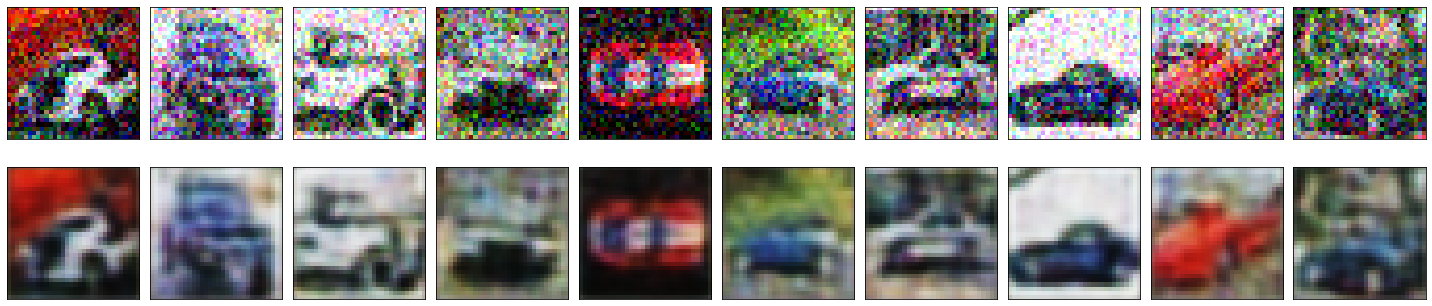

In [11]:
import matplotlib.pyplot as plt
#% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(2,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_n = x_train + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_train.shape) 

x_test_n = x_test + 0.5 *\
 np.random.normal(loc=0.0, scale=0.4, size=x_test.shape) 

x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test_n, 0., 1.)

In [16]:
inp_img = Input(shape=(32, 32, 3))
img = Conv2D(32, (3, 3), activation='relu', padding='same')(inp_img)
img = MaxPool2D((2, 2), padding='same')(img)
img = Conv2D(32, (3, 3), activation='relu', padding='same')(img)
img = UpSampling2D((2, 2))(img)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(img)


autoencoder = Model(inp_img, decoded)
Model.load_weights(autoencoder,'models/keras_autoencoder/autoencoder')

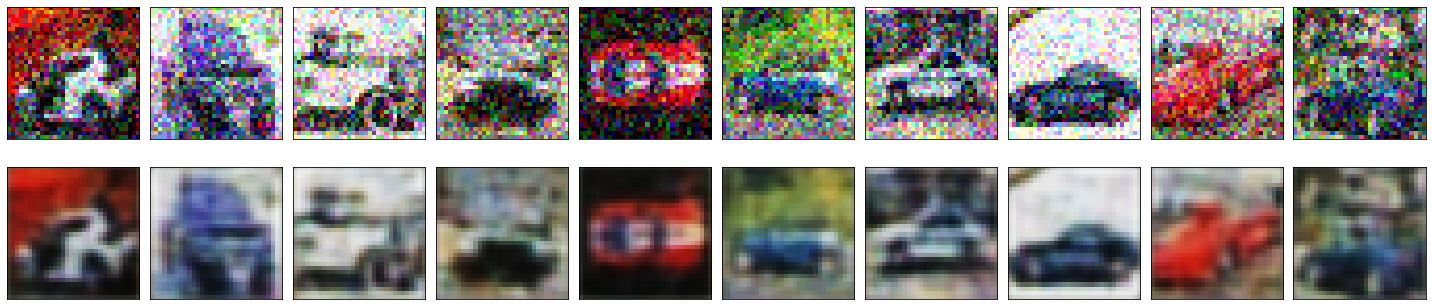

In [17]:
import matplotlib.pyplot as plt
#% matplotlib inline

n_imgs = 10
f,axarr = plt.subplots(2,n_imgs,figsize=[20,5])
decoded_imgs = autoencoder.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()